# Stock Analysis & Comparison

In [1]:
#pip install tagui

So let's now use TagUI for other useful stuff in our daily lives. The first thing that comes to mind is to use RPA for scraping purposes. So for the benefit of my future employer who may be interested in me, I'll be working on using RPA to scrape some useful data. Lets scrape data related to the stock market for now since its an easily retrievable dataset that we can pull out and make analysis with.

In [2]:
import tagui as t

In [3]:
class Stock(object):
    stockId = ""
    stockName = ""
    stockPrice = 0
    freeCashFlowPrev = ""
    freeCashFlowCurr = ""
    eps = 0
    dividendYield = ""
    peRatio = 0
    roe = ""
    netIncomePrev = ""
    netIncomeCurr = ""
    netOperatingIncomePrev = ""
    netOperatingIncomeCurr = ""
    
def make_stock(stockId, stockName, stockPrice, freeCashFlowPrev, freeCashFlowCurr, eps, dividendYield, peRatio, roe, netIncomePrev, netIncomeCurr, netOperatingIncomePrev, netOperatingIncomeCurr):
    stock = Stock()
    stock.stockId = stockId
    stock.stockName = stockName
    stock.stockPrice = stockPrice
    stock.freeCashFlowPrev = freeCashFlowPrev
    stock.freeCashFlowCurr = freeCashFlowCurr
    stock.eps = eps
    stock.dividendYield = dividendYield
    stock.peRatio = peRatio
    stock.roe = roe
    stock.netIncomePrev = netIncomePrev
    stock.netIncomeCurr = netIncomeCurr
    stock.netOperatingIncomePrev = netOperatingIncomePrev
    stock.netOperatingIncomeCurr = netOperatingIncomeCurr

    return stock

In [4]:
stock_array = list()
stocks = list()

"""number = input("Enter the number of stocks you want to analyze:")
print ('Enter each Stock ID, Eg.CJLU.SI: ')
for i in range(int(number)):
    n = input("Stock ID "+str(i+1)+": ")
    #We should carry out conditional checks here to verify that the Stock Listing is Valid before proceeding
    ######################################################################################################
    stock_array.append(n)
print ('Stock IDs:' ,stock_array)
"""
########FOR PRACTICE##########
stock_array = ['CJLU.SI','CNE.SI','AP4.SI','CHZ.SI','BSL.SI','V03.SI','M1GU.SI','AJBU.SI','ME8U.SI']

In [5]:
#Open Yahoo stock site to scrape relevant data of stocks we want to look at.
url = 'https://sg.finance.yahoo.com/quote/'
t.init(visual_automation = True, chrome_browser = True)


#We then iterate through the stocks code that have been selected
for i in stock_array:
    newUrl = url + i +'/'
    t.url(newUrl)
    #Carry out scraping of data here
    t.wait(2)
    
    #Storing current price of the stock
    stockId = i
    stockPrice = float(t.read('//*[@id="quote-header-info"]/div[3]/div/div/span[1]'))
    stockName = t.read('//*[@id="quote-header-info"]/div[2]/div[1]/div[1]/h1')    
    
    #Storing key indicators of stock
    dividendYield = ((t.read('//*[@id="quote-summary"]/div[2]/table/tbody/tr[6]/td[2]')))
    peRatio = float((t.read('//*[@id="quote-summary"]/div[2]/table/tbody/tr[3]/td[2]/span')))
    eps = float((t.read('//*[@id="quote-summary"]/div[2]/table/tbody/tr[4]/td[2]/span')))
    
    #Go to the financials tab to scrape data
    t.click('//*[@id="quote-nav"]/ul/li[7]/a/span') 
    netIncomePrev = ((t.read('//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[11]/div[1]/div[4]/span')))
    netIncomePrev = netIncomePrev.replace(',', '')

    netIncomeCurr = ((t.read('//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[11]/div[1]/div[3]/span')))    
    netIncomeCurr = netIncomeCurr.replace(',', '')

    netOperatingIncomePrev = ((t.read('//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[5]/div[1]/div[4]/span')))
    netOperatingIncomePrev = netOperatingIncomePrev.replace(',', '')

    netOperatingIncomeCurr = ((t.read('//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[5]/div[1]/div[3]/span')))
    netOperatingIncomeCurr = netOperatingIncomeCurr.replace(',', '')

    #Go to the Cash Flow tab to scrape data
    t.click('//*[@id="Col1-1-Financials-Proxy"]/section/div[1]/div[1]/div/a[2]/div/span') 
    freeCashFlowPrev = ((t.read('//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[7]/div[2]/div[3]/div[1]/div[4]/span')))
    freeCashFlowPrev = freeCashFlowPrev.replace(',', '')
    freeCashFlowCurr = ((t.read('//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[7]/div[2]/div[3]/div[1]/div[3]/span')))
    freeCashFlowCurr = freeCashFlowCurr.replace(',', '')
    
    #Go to Statistics tab to scrape data
    t.click('//*[@id="quote-nav"]/ul/li[4]/a') 
    roe = ((t.read('//*[@id="Col1-0-KeyStatistics-Proxy"]/section/div[2]/div[3]/div/div[3]/div/table/tbody/tr[2]/td[2]')))
    
    stock = make_stock(stockId, stockName, stockPrice, freeCashFlowPrev, freeCashFlowCurr, eps, dividendYield, peRatio, roe, netIncomePrev, netIncomeCurr, netOperatingIncomePrev, netOperatingIncomeCurr)
    stocks.append(stock)
    
t.close()

True

In [6]:
for i in stocks[0:1]:
    print('Stock ID: ',i.stockId)
    print('Stock Name: ',i.stockName)
    print('Stock Price: ',i.stockPrice)
    print('Previous Year Net Income: ',i.netIncomePrev)
    print('Latest Net Income: ',i.netIncomeCurr)
    print('Previous Operating Income: ',i.netOperatingIncomePrev)
    print('Latest Operating Net Income: ',i.netOperatingIncomeCurr)
    print('Previous Free Cash Flow: ',i.freeCashFlowPrev)
    print('Latest Cash Flow: ',i.freeCashFlowCurr)
    print('Earnings Per Share: ',i.eps)
    print('Dividend Yield: ',i.dividendYield)
    print('PE Ratio: ',i.peRatio)
    print('ROE: ',i.roe)
    print(' ')
    
    #Use XPath!!!!

Stock ID:  CJLU.SI
Stock Name:  NetLink NBN Trust (CJLU.SI)
Stock Price:  0.93
Previous Year Net Income:  49950
Latest Net Income:  77359
Previous Operating Income:  54468
Latest Operating Net Income:  85418
Previous Free Cash Flow:  -53730
Latest Cash Flow:  158542
Earnings Per Share:  0.021
Dividend Yield:  0.05 (5.33%)
PE Ratio:  44.29
ROE:  N/A
 


### Analysis & Visualisation of Scraped Data of Selected Stocks

In [7]:
#Change in Net Income
#Change in Operating Income
stockNames = list()
changeOpIncome = list()
changeNetIncome = list()

for i in stocks:
    stockNames.append(i.stockName)
    changeInOperatingIncome = float(i.netOperatingIncomeCurr) - float(i.netOperatingIncomePrev)
    changeOpIncome.append(changeInOperatingIncome)    
    changeInNetIncome = float(i.netIncomeCurr) - float(i.netIncomePrev)
    changeNetIncome.append(changeInNetIncome)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.title('Change in Operating Income ($ in Thousands)')
plt.barh(stockNames, changeOpIncome, color=['black', 'grey', 'green', 'blue', 'cyan'])
plt.show()

<Figure size 640x480 with 1 Axes>

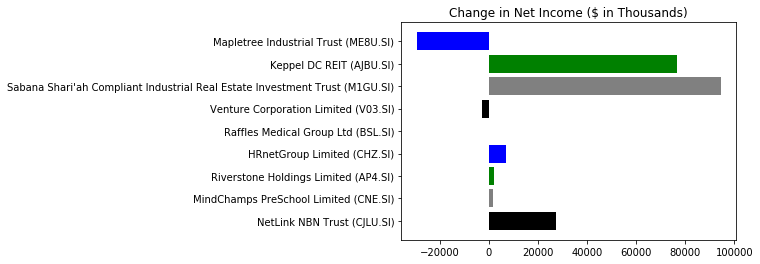

In [9]:
import matplotlib.pyplot as pltNetIncome
pltNetIncome.title('Change in Net Income ($ in Thousands)')
pltNetIncome.barh(stockNames, changeNetIncome, color=['black', 'grey', 'green', 'blue', 'cyan'])
pltNetIncome.show()

In [10]:
cashFlowPrev = list()
cashFlowCurr = list()
changeCashFlow = list()

for i in stocks:
    cashFlowC = float(i.freeCashFlowCurr)
    cashFlowP = float(i.freeCashFlowPrev)
    change = (cashFlowC - cashFlowP)/abs(cashFlowP)
    
    changeCashFlow.append(change)
    cashFlowPrev.append(cashFlowP)
    cashFlowCurr.append(cashFlowC)

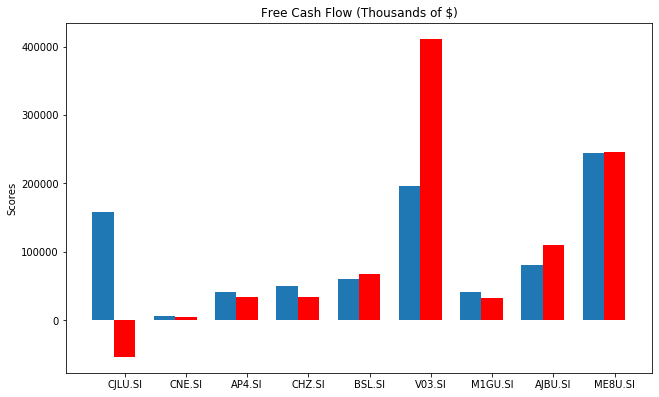

In [11]:
#Current Cash Flow
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

barWidth = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(len(stock_array))
r2 = [x + barWidth for x in r1]

fig, ax = plt.subplots()
rects2 = ax.bar(r2, cashFlowPrev, width=barWidth, color='red', label='Previous Year Cash Flow')
rects1 = ax.bar(r1, cashFlowCurr, width=barWidth, label='Current Year Cash Flow' )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Free Cash Flow (Thousands of $)')
plt.xticks([r + barWidth for r in range(len(stock_array))], stock_array)

fig.tight_layout()
fig.set_figheight(6)
fig.set_figwidth(10)
#Show graphic
plt.show()

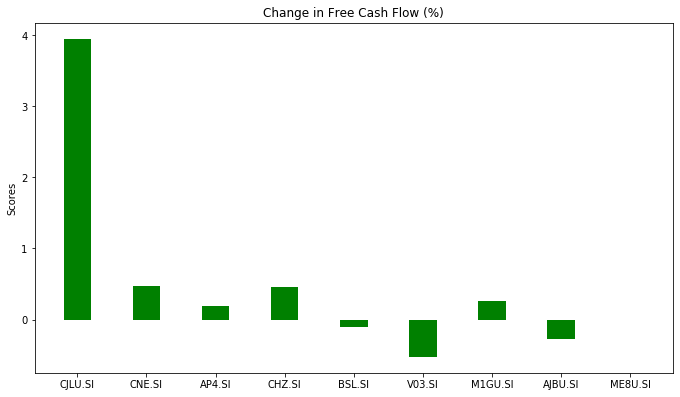

In [12]:
#Change in Free Cash Flow
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

barWidth = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(stock_array, changeCashFlow, width=barWidth, label='Current Year Cash Flow' , color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Change in Free Cash Flow (%)')
fig.tight_layout()

fig.set_figheight(6)
fig.set_figwidth(10)

plt.show()

### Summary of Top 3 Stocks Based on Each Indicator

In [13]:
#Current Earnings Per Share
epsList = list()
#PE Ratio
peList = list()
#ROE
roeList = list()
#Dividend Yield
divList = list()

for i in stocks:
    epsList.append(i.eps)
    peList.append(i.peRatio)
    roeList.append(i.roe)
    divList.append(i.dividendYield)
    

#### Top Earnings Per Share Stocks

In [14]:
stockNamesCopy = stockNames.copy()
epsListCopy = epsList.copy()
for i in range(3):
    top1 = max(epsListCopy)
    top1Index = epsListCopy.index(top1)
    print(stockNamesCopy[top1Index] + ':', top1)
    epsListCopy.remove(top1)
    stockNamesCopy.remove(stockNamesCopy[top1Index])


Venture Corporation Limited (V03.SI): 1.29
Mapletree Industrial Trust (ME8U.SI): 0.144
Keppel DC REIT (AJBU.SI): 0.112


#### Top PE Ratio Stock

In [15]:
stockNamesCopy = stockNames.copy()
peListCopy = peList.copy()
for i in range(4):
    top1 = max(peListCopy)
    top1Index = peListCopy.index(top1)
    print(stockNamesCopy[top1Index] + ':', top1)
    peListCopy.remove(top1)
    stockNamesCopy.remove(stockNamesCopy[top1Index])


NetLink NBN Trust (CJLU.SI): 44.29
Raffles Medical Group Ltd (BSL.SI): 27.86
MindChamps PreSchool Limited (CNE.SI): 23.68
Riverstone Holdings Limited (AP4.SI): 21.74


#### Top Return on Equity Stocks

In [16]:
stockNamesCopy = stockNames.copy()
roeListCopy = roeList.copy()
for i in range(4):
    top1 = max(roeListCopy)
    top1Index = roeListCopy.index(top1)
    print(stockNamesCopy[top1Index] + ':', top1)
    roeListCopy.remove(top1)
    stockNamesCopy.remove(stockNamesCopy[top1Index])


NetLink NBN Trust (CJLU.SI): N/A
Mapletree Industrial Trust (ME8U.SI): 9.20%
MindChamps PreSchool Limited (CNE.SI): 8.36%
Raffles Medical Group Ltd (BSL.SI): 7.90%


#### Top Dividend Yield Stocks

In [17]:
#Dividend Yield
stockNamesCopy = stockNames.copy()
divListCopy = divList.copy()
for i in range(4):
    top1 = max(divListCopy)
    top1Index = divListCopy.index(top1)
    print(stockNamesCopy[top1Index] + ':', top1)
    divListCopy.remove(top1)
    stockNamesCopy.remove(stockNamesCopy[top1Index])

Venture Corporation Limited (V03.SI): 0.70 (4.26%)
Mapletree Industrial Trust (ME8U.SI): 0.12 (4.63%)
Keppel DC REIT (AJBU.SI): 0.09 (4.53%)
NetLink NBN Trust (CJLU.SI): 0.05 (5.33%)


### Reccommended Stock to Consider

In [18]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to Hide/Show the raw code."></form>''')